# The Hall Effect

$ n_{sq} $ is the number of electrons per square, $ R_{sq} $ is the resistance per square.

This has equation $ R_{sq} = \frac{1}{n_{sq}e\mu} $

$ \mu $ is the electron mobility in the well, also defined as the mean drift velocity per unit applied electroc field.

The higher the mobility the lower the resistance per unit area, mobility is limited by scattering, at high tempertures the scattering is limited by thermil vibrations (when molecules vibrate they bump into each other converting kinetic energy sometimes radiate as heat). At lower tempertures the scattering is dominated by defects in the structure.

Because of design there is very little defect scattering and the carrier mobility at low tempertures can be very high, even at liquid nitrogen the carrirt mobility can be better than at room temperture.


![sample_geometry.pdf](sample_geometry.pdf)


I is the curernt flowing through a conductor, with a rectangular cross-section of width w, and depth d. Applying a magnetic induction of magnitude B,perpendicular (into the page) to the side of dimention w this cause a lorentz force, evB, on the charge carriers in the current, where v is the average velocity. As charge carriers cannot leave the sides of the conductor, a surface charge builds up until there is a transverse electric field (perpendicular to magnetic field), $ E_{t} $, such that the net force on the carriers is zero( becuase the lorentz force they get will be equal to the force they are getting from the created electric field?)

The lorentz firce evB = $ eE_{t} $ = $ \frac{eV_{t}}{w} $. $ V_{t} $ is the transverse voltage scross the conductir and is the Hall voltage $ V_{H} = V_{t} $ 

J is the current density: $ J = nev $ n is the number of carriers per unit volume and so I = Jdw = nevdw. 

The hall coefficient $ R_{H} $ is: $ R_{H} = \frac{1}{B}\frac{E_{t}}{J} = \frac{d}{B}\frac{V_{H}}{I} = \frac{1}{ne} $

In 2-D case, the current per unit area becomes current per unit width: $ \frac{I}{w} = n_{sq}ev $ , so 2-D Hall coeffient ,$ R_{H,sq} $ is defined as: $ R_{H,sq} = \frac{1}{B} \frac{E_{t}}{\frac{1}{w}} = \frac{1}{B} \frac{V_{H}}{I} = \frac{1}{N_{sq}e} $

TO measure $ R_{sq} $, the basic equation V=IR, also $ v= \mu E = \mu\frac{V_{l}}{l} $ . For the geometry of the Hall bar:

$$ R_{sq} = R \frac{w}{l} = \frac{V_{l}}{n_{sq}evl}=\frac{1}{n_{sq}e\mu} $$ 

Where $ V_{l} $ is meaured between 1 and 4 or between 2 and 3, thus by measuring $ R_{sq} and R_{H,sq} $ carrier density per unit area, $ n_{sq} $ can the carrier mobility $ \mu $ can be found. 



# Principle of the measurement technique

![HALLBAR.png](HALLBAR.png)

Current is passed through from one end to the other, this is supplied by a speacial connector at one end. The reason there is two 150 ohn resistors is becuase this ensures that when the power is supply is set to a max voltage, it is impossible to drive a curretn which could damage the Hall bar. 
The four terminals 1-4 are for convential banana plugs and for voltage measuremnts only with a digital voltmeter - no current should be applied via these terminals. length of the active region l is 300 micro meters and the width is 100 micro meters.

The measurement of the sample longitudial resistance is done by monitoring the voltage between contaccts 1 and 4 or 2 and 3.

Hall voltage is measured between 1 and 2 or 4 and 3 with the magnetic field applied perpendicular to the plane of the sample.

longitudual resistance is measuremed the same way as hall voltage but hall voltage has magnetic field applied perpendiculrar.

Ammeter terminals at the end are for measuring the current flowing through the whole device in series, done with digitta lmultimeter (current should be in micros amps), are for banana plugs.

# The experimental method

c

In [1]:
import numpy as np # importing all the appropriate librabies.
import scipy as sp
from scipy.optimize import curve_fit
import pandas as pd
from scipy.signal import find_peaks
import scipy.constants as sc
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size' : 30, "font.family" : "Times New Roman", "text.usetex" : True})

# Manual Measurements

## Objectives 

* Familiarize ourseleves with the equipment 

* Investigate the effect of changing the voltage

* Investigate the effect of increasing the elecromagnets voltage 

* Estimate values for the 2-D Hall coefficent, resistanece per square, carrier density and carrier mobility


In this part of the lab we will look into the effect of changing the voltage across the Hall bar setup. We wll take readings on our multimeter of voltage and current. Our voltmeter will have two different setups, one will be measureing the longitudial voltage (connected via 2 and 3)  and the other will be measureing the hall voltage (connected via (1 and 2). We will take measuements of 6 points (2V-12V) and plots some graphs to see the relationships.

We will also take measurements to find how the voltage and current across the Hall bar vaires when the voltage is changed across the electromagnet. The same 6 points will be used and plotted.

From here we will calculate our values for the 2-D Hall coefficent ($ R_{H,sq} $), resistance per square ( $R_{sq}$ ) carrier density (n) and carrier mobility($ \mu $ ) using equations ____.


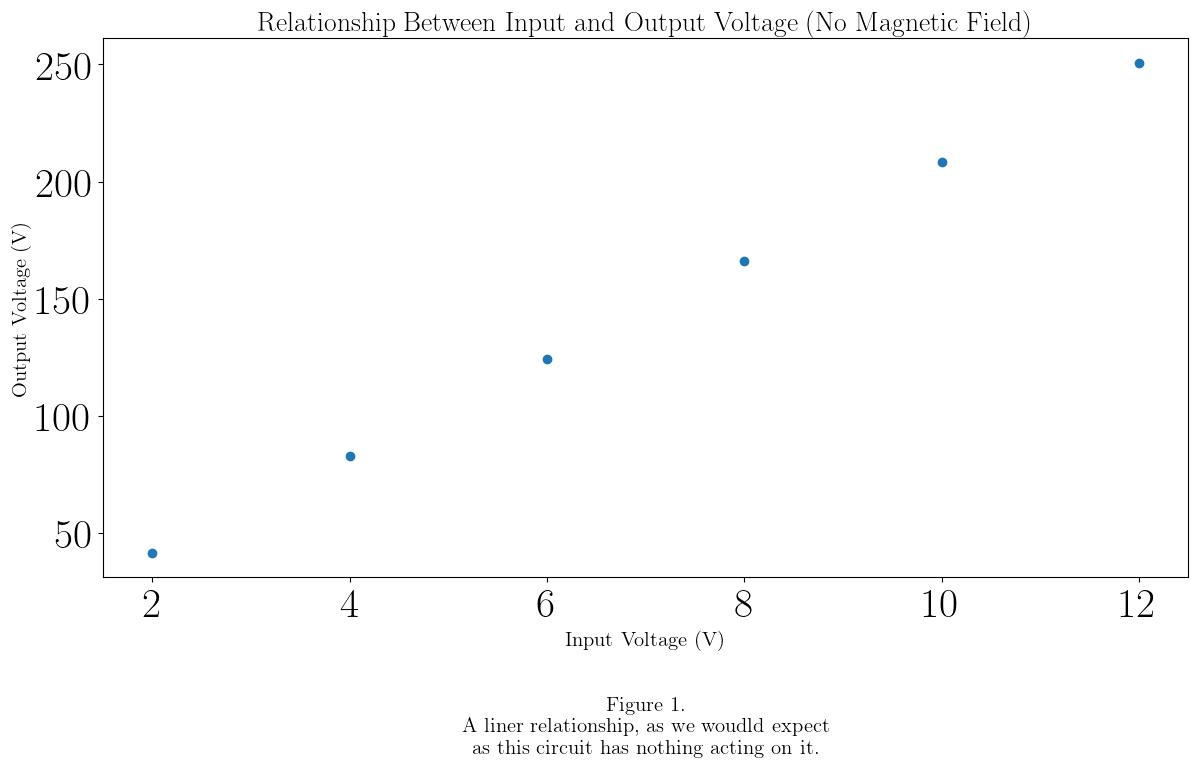

In [4]:
data = np.loadtxt('data/no_mag.txt', skiprows=3) # importing data

# Data
I = data[:, 0]
B = data[:, 1]
V = data[:, 2]

plt.figure(figsize=(14, 7))

plt.plot(I, B, 'o', label='Data')
plt.title(' Relationship Between Input and Output Voltage (No Magnetic Field)',fontsize = 20)
plt.xlabel('Input Voltage (V) \n\n\n Figure 1. \n A liner relationship, as we woudld expect \n as this circuit has nothing acting on it. ' ,fontsize = 15)
plt.ylabel('Output Voltage (V)',fontsize = 15)

plt.show()

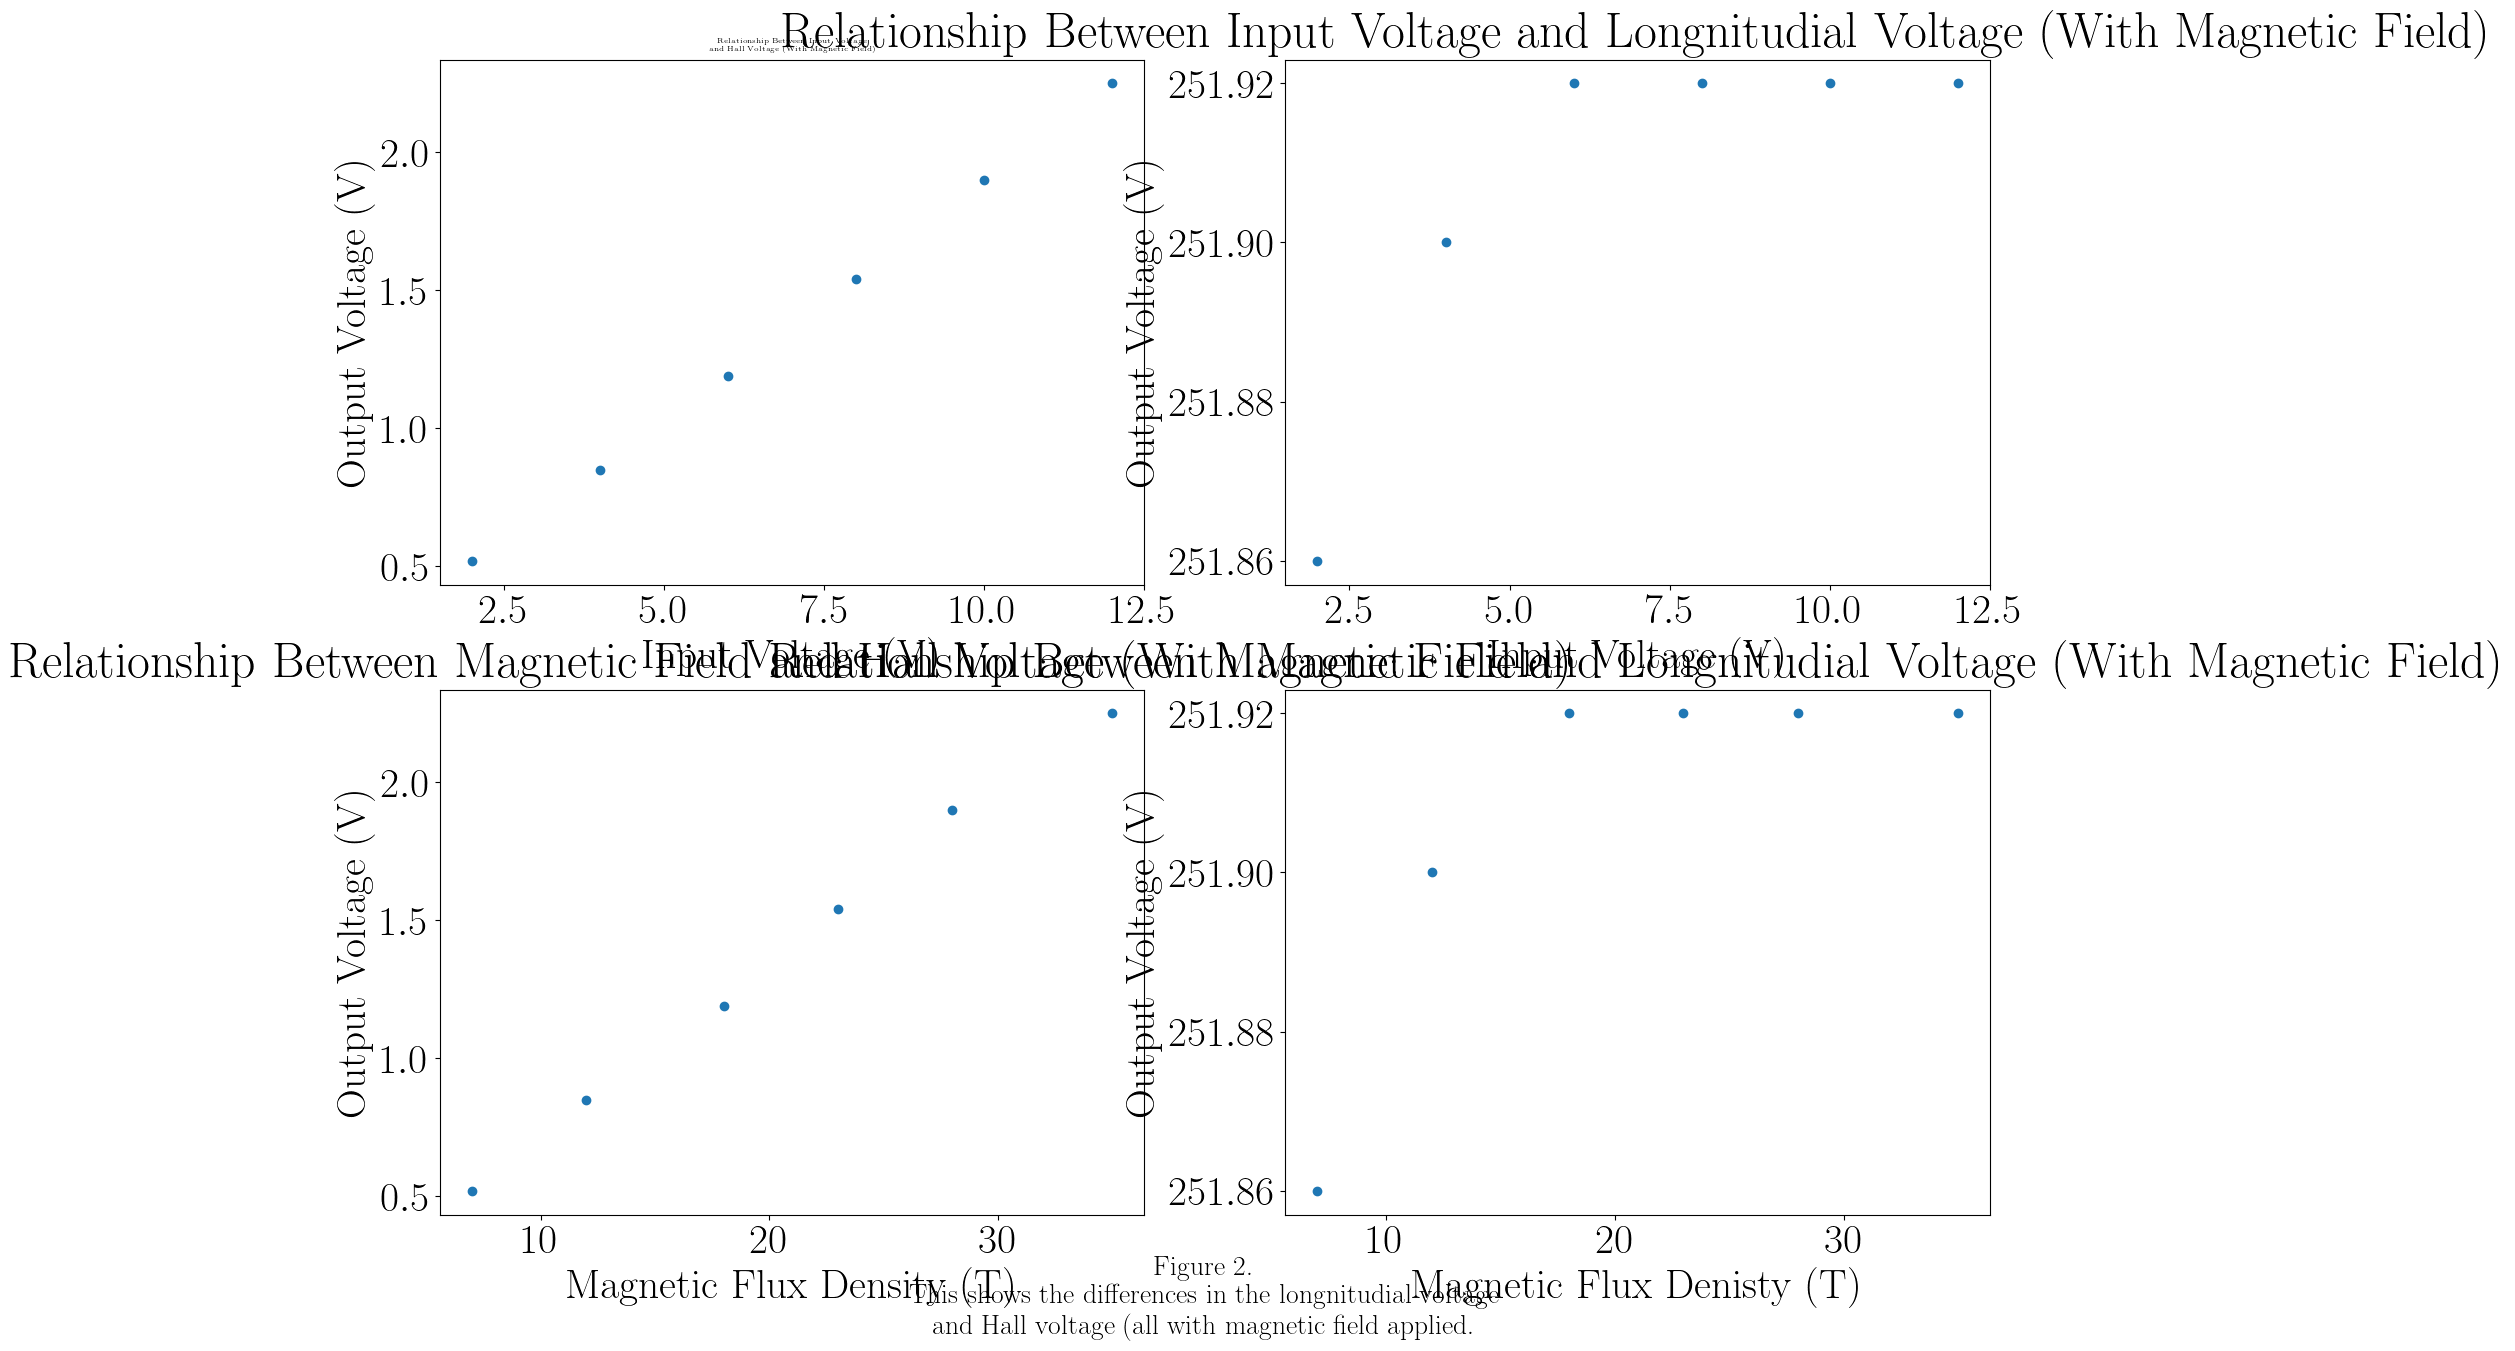

In [7]:
txt = 'Figure 2. \n This shows the differences in the longnitudial voltage \n and Hall voltage (all with magnetic field applied.'
data = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(data[:, 0], data[:, 1], 'o', label='Data')
plt.title('Relationship Between Input Voltage \n and Hall Voltage (With Magnetic Field)',fontsize = 5)
plt.xlabel('Input Voltage (V)')
plt.ylabel('Output Voltage (V)')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.title('Relationship Between Input Voltage and Longnitudial Voltage (With Magnetic Field)')
plt.xlabel('Input Voltage (V)')
plt.ylabel('Output Voltage (V)')
plt.subplot(2,2,3)
plt.plot(data[:, 3], data[:, 1], 'o', label='Data')
plt.title('Relationship Between Magnetic Field and Hall Voltage (With Magnetic Field)')
plt.xlabel('Magnetic Flux Density (T)')
plt.ylabel('Output Voltage (V)')
plt.text(39, .00000005, txt, ha='center',fontsize = 20)
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.title('Relationship Between Magnetic Field and Longnitudial Voltage (With Magnetic Field)')
plt.xlabel('Magnetic Flux Denisty (T) ')
plt.ylabel('Output Voltage (V)')
plt.show()

In figure 2 we see 4 graphs. Top left shows the graph of the output voltage against the input voltage with the setup so we are taking reaadings across the the 1 and 2 points. This graph shows that the Hall voltage increase proportionally with input voltage. The top right graph shows the relationship when the setup was measureing the voltage across the 1 and 3 points, which is the longnitudial voltage. We can see that this barely changes at all, this is as expected as in the setup we would not expect any affects from the Hall effect as we are measuring in the direction that the current is flowing. In the bottom left graph we see the same relation as the top left except we have magnetic flux density on the x-axis. This is because as we increased the voltage on the elctromagnet the magnetic flux denisty increased at the same rate. This is why in the bottom right graph we also see the same relationship (barely any change in longnitudial voltage as magnetic flux density is increased.

We will now go on to calculate the values for 2-D Hall coefficent, resistanece per square, carrier density and carrier mobility.\

In [8]:
def RHsq(B,Vh,I):
    return (1/B)*(Vh/I)

rhsq = []
for i in np.arange(len(data[0])):
    Rhsq = RHsq(data[i,3]*1e-3,data[i,1]*1e-3,data[i,2]*1e-6)
    print(Rhsq)
    rhsq.append(Rhsq)


R_hall = []    
for i in np.arange(len(data[0])):
    R = (data_long[i,1])/(data_long[i,2]*1e-3)
    R_hall.append(R)

print(rhsq)   
mean_Rhsq = np.mean(rhsq)
print('The 2-D hall coefficent is:',mean_Rhsq)

Rsq = (np.mean(data_long[:,1]*1e-3)/37.32e-6)*1/3
nsq = 1/(mean_Rhsq*sc.e)
mu = 1/(Rsq*sc.e*nsq)


print('The resistance per square meter is',Rsq)
print('The carrier density is',nsq)
print('The carrier mobility is',mu)

1989.9735945811492
1897.490847397089
1770.9914575706161
1793.6384071559187
[1989.9735945811492, 1897.490847397089, 1770.9914575706161, 1793.6384071559187]
The 2-D hall coefficent is: 1863.0235766761932
The resistance per square meter is 2249.970227462188
The carrier density is 3350204019208492.0
The carrier mobility is 0.8280214351003017


In [14]:
# error propagation 
V_error = 0.5e-3
I_error = 0.5e-6
B_error = 0.5e-3

def errorfunc(w,x,y,z,dx,dy,dz):
    return w*((dx/x)**2+(dy/y)**2+(dz/z)**2)**(1/2)

Rhsq_error = []
for i in np.arange(len(data[0])):
    
    error = errorfunc(Rhsq,data[i,3]*1e-3,data[i,1]*1e-3,data[i,2]*1e-6,B_error,V_error,I_error)
   
    Rhsq_error.append(error)
    
    
  
print('The error on the 2-D hall coefficent is ±',np.mean(Rhsq_error))

# nsq error prop

nsq_error = nsq*(np.mean(Rhsq_error)/mean_Rhsq)

print(f'The error on the carrier density is ± {nsq_error:.4g}')

#error on the resistance per square meter
Rsq_err = []
for i in np.arange(len(data_long[0])):
    Rsq_er = errorfunc(Rsq,1,data_long[i,1],data_long[i,2],0,V_error,I_error)
    Rsq_err.append(Rsq_er)
Rsq_error = np.mean(Rsq_err)  

print(f'The error on the resistance per square is ± {Rsq_error:.4g}')

#error on mu

mu_error = errorfunc(mu,Rsq,nsq,1,Rsq_error,nsq_error,0)/mu

print('The error on the carrier mobility is ±',mu_error)

The error on the 2-D hall coefficent is ± 1031.8435039370645
The error on the carrier density is ± 1.856e+15
The error on the resistance per square is ± 0.004466
The error on the carrier mobility is ± 0.5538542382724945


# Effect of Angle

## Objectives

* Investigate how angle affects are values of outout voltage

* See the relationship between angle and output voltage over a 360 degrees cycle

s

[ 2.40548325 -0.06013692  3.7959637 ]


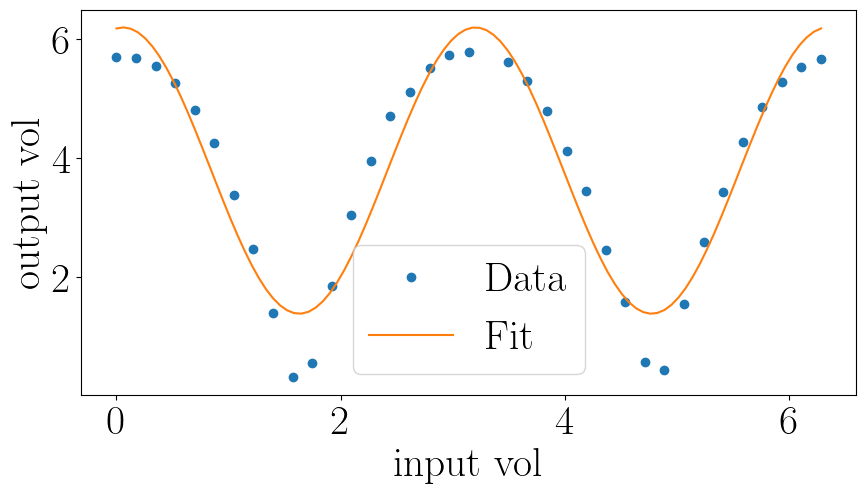

In [16]:
data_ang = np.loadtxt('data/angle.txt', skiprows=2)
angle_rad = np.deg2rad(data_ang[:,1])
angle_smoother = np.linspace(0,np.pi*2,100)
# Data

def cos_func(x,a,b,c):
    return (a*np.cos(2*(x+b))+c)

pop,popt = curve_fit(cos_func,angle_rad,data_ang[:,0],p0 =[2.40548325,-0.06013691,3.7959637])



plt.figure(figsize=(10, 5))

plt.plot(angle_rad,data_ang[:,0],'o', label='Data')
plt.plot(angle_smoother,cos_func(angle_smoother,pop[0],pop[1],pop[2]),label='Fit')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.legend()


print(pop)

/local/environments/default/default-venv/lib64/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


TypeError: 'numpy.float64' object is not callable

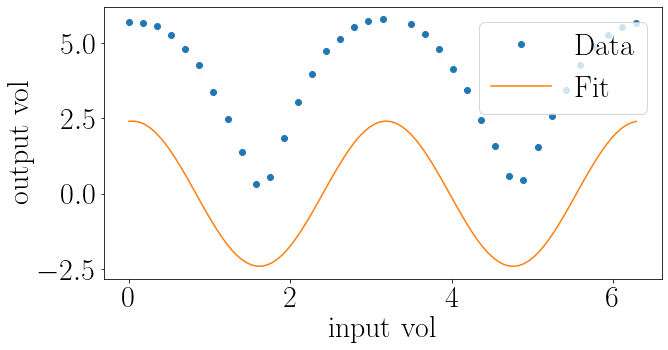

In [ ]:
data_ang = np.loadtxt('Task_B/angle_data.txt', skiprows=2)
angle_rad = np.deg2rad(data_ang[:,1])
angle_smoother = np.linspace(0,np.pi*2,100)
# Data

def cos_func(x,a,b,c):
    return (a*np.sin(2*(x+b)))

pop,popt = curve_fit(cos_func,angle_rad,data_ang[:,0])



plt.figure(figsize=(10, 5))

plt.plot(angle_rad,data_ang[:,0],'o', label='Data')
plt.plot(angle_smoother,cos_func(angle_smoother,pop[0],pop[1],pop[2]),label='Fit')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.legend()


print(pop)